In [1]:
from qiskit import *
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default') 
backend = provider.get_backend('ibmq_casablanca')

/home/siyuan/anaconda3/lib/python3.8/site-packages/qiskit/aqua/operators/operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))
/home/siyuan/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
from math import pi
from qiskit.visualization import plot_histogram 

# Choose the pairs that are impacted the most by crosstalk
# (1,3) - (4,5) 


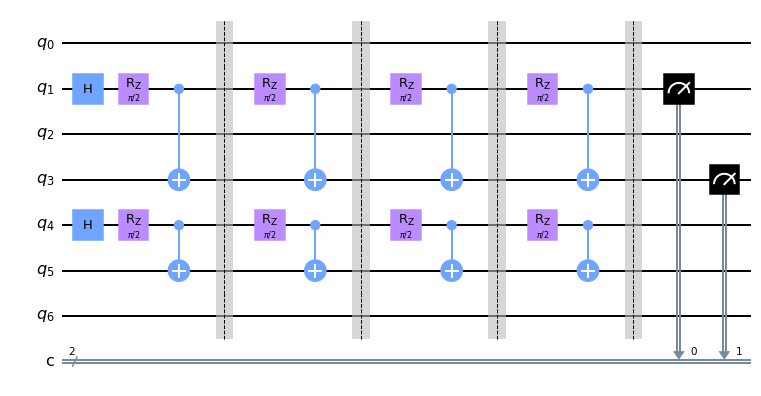

In [3]:
qc = QuantumCircuit(7,2)
qc.h(1)
qc.h(4)
qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()

qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()

qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()

qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()
qc.measure([1,3],list(range(2)))
qc.draw(output='mpl')

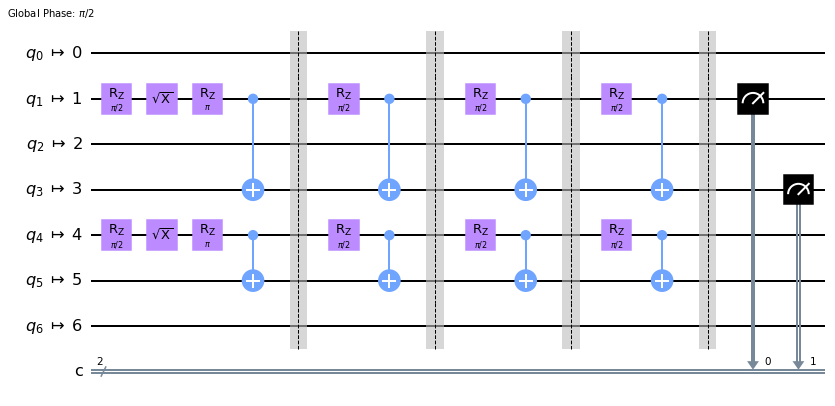

In [8]:
from qiskit import transpile
compiled_circuit = transpile(qc, backend=backend)
compiled_circuit.draw(output="mpl")

/home/siyuan/Seafile/Thesis/jupyter/qiskit-terra/qiskit/visualization/pulse_visualization.py:143: DeprecationWarning: This legacy pulse drawer is deprecated and will be removed no earlier than 3 months after the release date. Use `qiskit.visualization.pulse_drawer_v2` instead. After the legacy drawer is removed, the import path of this module will be dedicated to the v2 drawer. New drawer will provide much more flexibility with richer stylesheets and cleaner visualization.
  warnings.warn('This legacy pulse drawer is deprecated and will be removed no earlier than '
/home/siyuan/Seafile/Thesis/jupyter/qiskit-terra/qiskit/visualization/pulse/qcstyle.py:126: DeprecationWarning: The legacy pulse drawer is deprecated along with this stylesheet. Please use new drawer `qiskit.visualization.pulse_drawer_v2` with new stylesheet classes provided by `qiskit.visualization.pulse_v2`. You can choose one of `IQXStandard`, `IQXSimple`, `IQXDebugging`.
  warnings.warn('The legacy pulse drawer is deprec

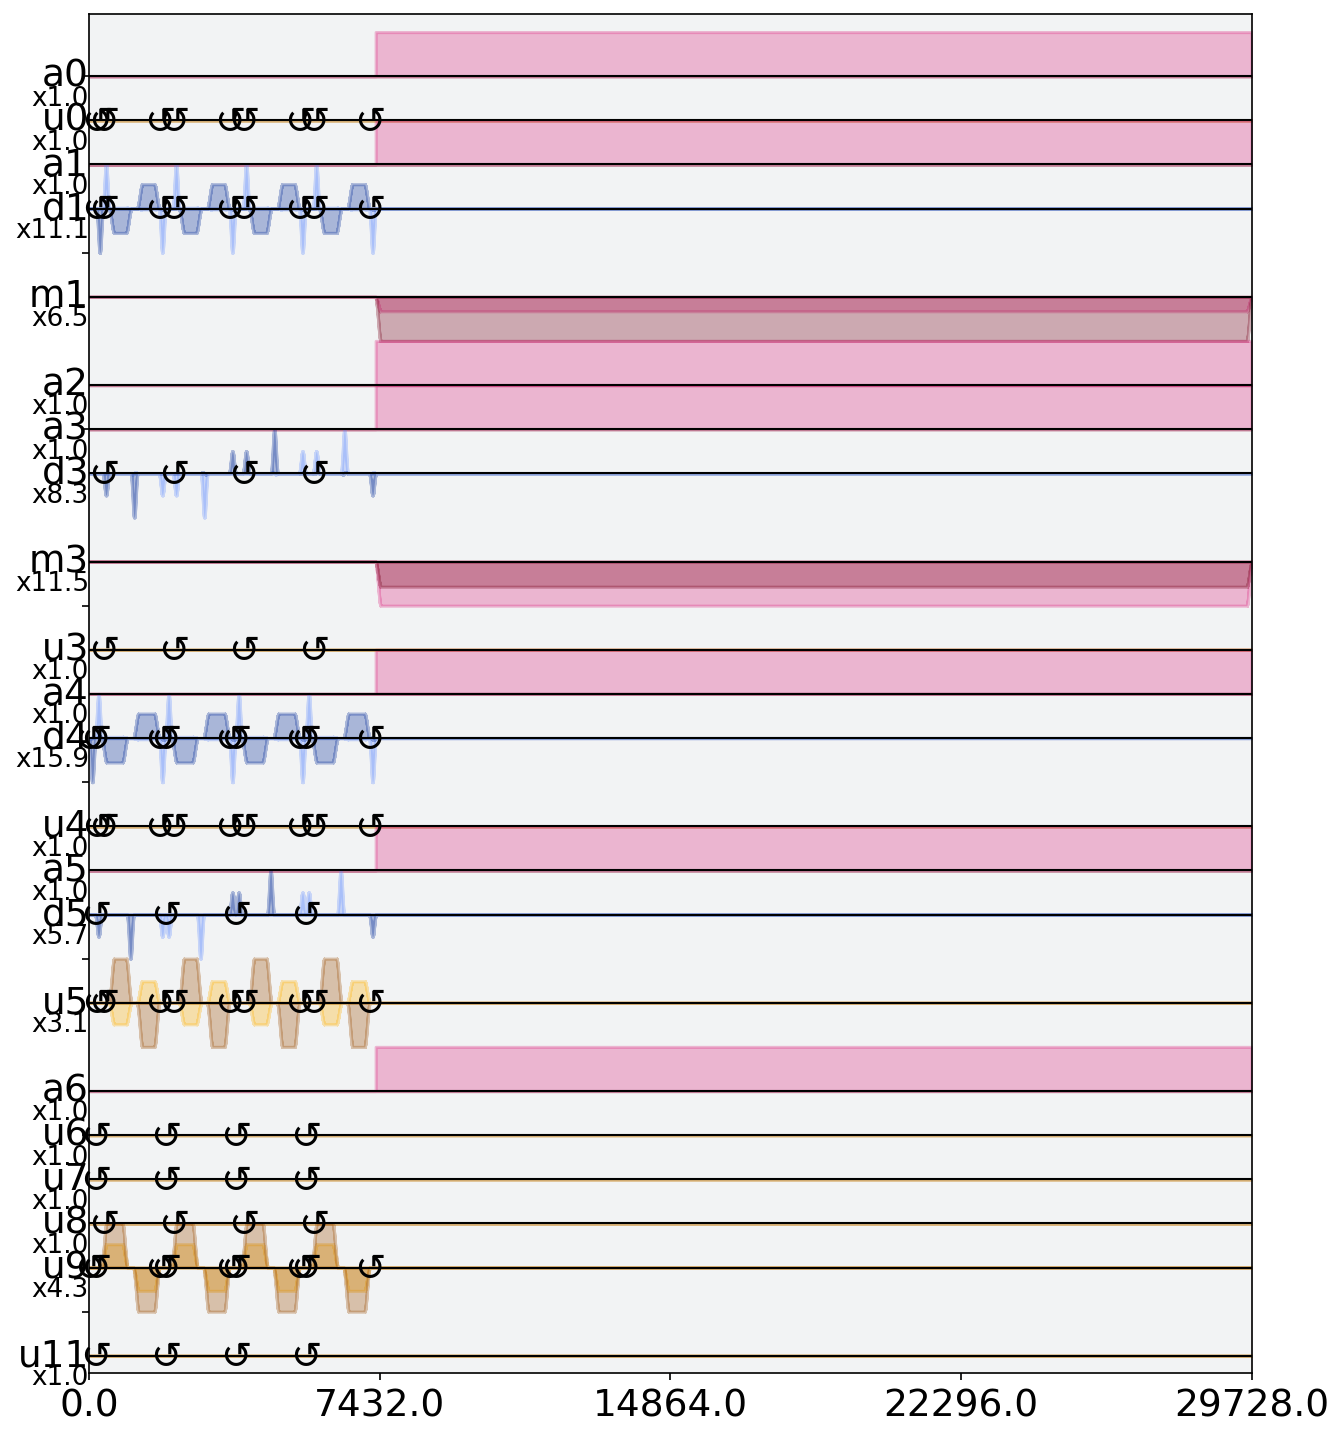

In [9]:

from qiskit import schedule
from qiskit.visualization import pulse_drawer
schd = schedule(compiled_circuit, backend)
pulse_drawer(schd)

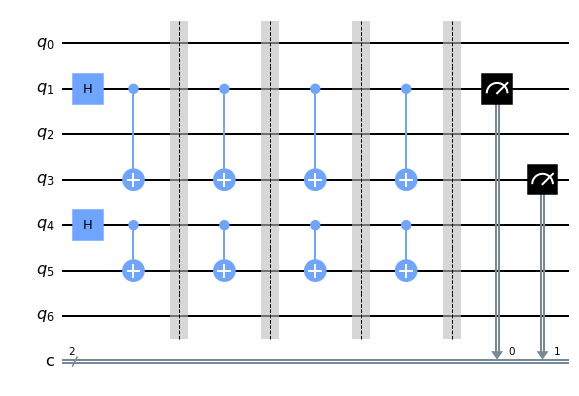

In [10]:
qc = QuantumCircuit(7,2)
qc.h(1)
qc.h(4)
qc.cx(1,3)
qc.cx(4,5)
qc.barrier()

qc.cx(1,3)
qc.cx(4,5)
qc.barrier()

qc.cx(1,3)
qc.cx(4,5)
qc.barrier()

qc.cx(1,3)
qc.cx(4,5)
qc.barrier()
qc.measure([1,3],list(range(2)))
qc.draw(output='mpl')

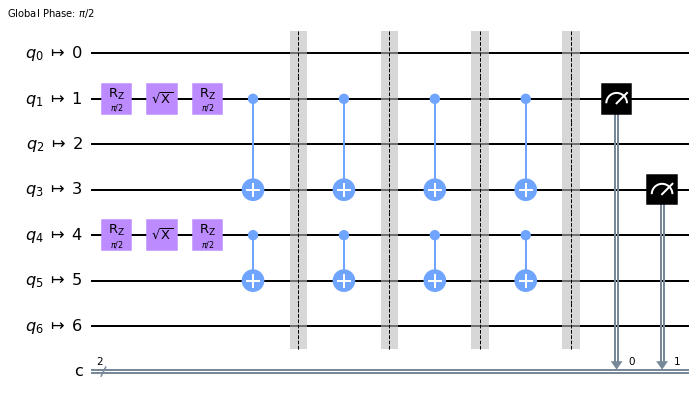

In [11]:
from qiskit import transpile
compiled_circuit = transpile(qc, backend=backend)
compiled_circuit.draw(output="mpl")

/home/siyuan/Seafile/Thesis/jupyter/qiskit-terra/qiskit/visualization/pulse_visualization.py:143: DeprecationWarning: This legacy pulse drawer is deprecated and will be removed no earlier than 3 months after the release date. Use `qiskit.visualization.pulse_drawer_v2` instead. After the legacy drawer is removed, the import path of this module will be dedicated to the v2 drawer. New drawer will provide much more flexibility with richer stylesheets and cleaner visualization.
  warnings.warn('This legacy pulse drawer is deprecated and will be removed no earlier than '
/home/siyuan/Seafile/Thesis/jupyter/qiskit-terra/qiskit/visualization/pulse/qcstyle.py:126: DeprecationWarning: The legacy pulse drawer is deprecated along with this stylesheet. Please use new drawer `qiskit.visualization.pulse_drawer_v2` with new stylesheet classes provided by `qiskit.visualization.pulse_v2`. You can choose one of `IQXStandard`, `IQXSimple`, `IQXDebugging`.
  warnings.warn('The legacy pulse drawer is deprec

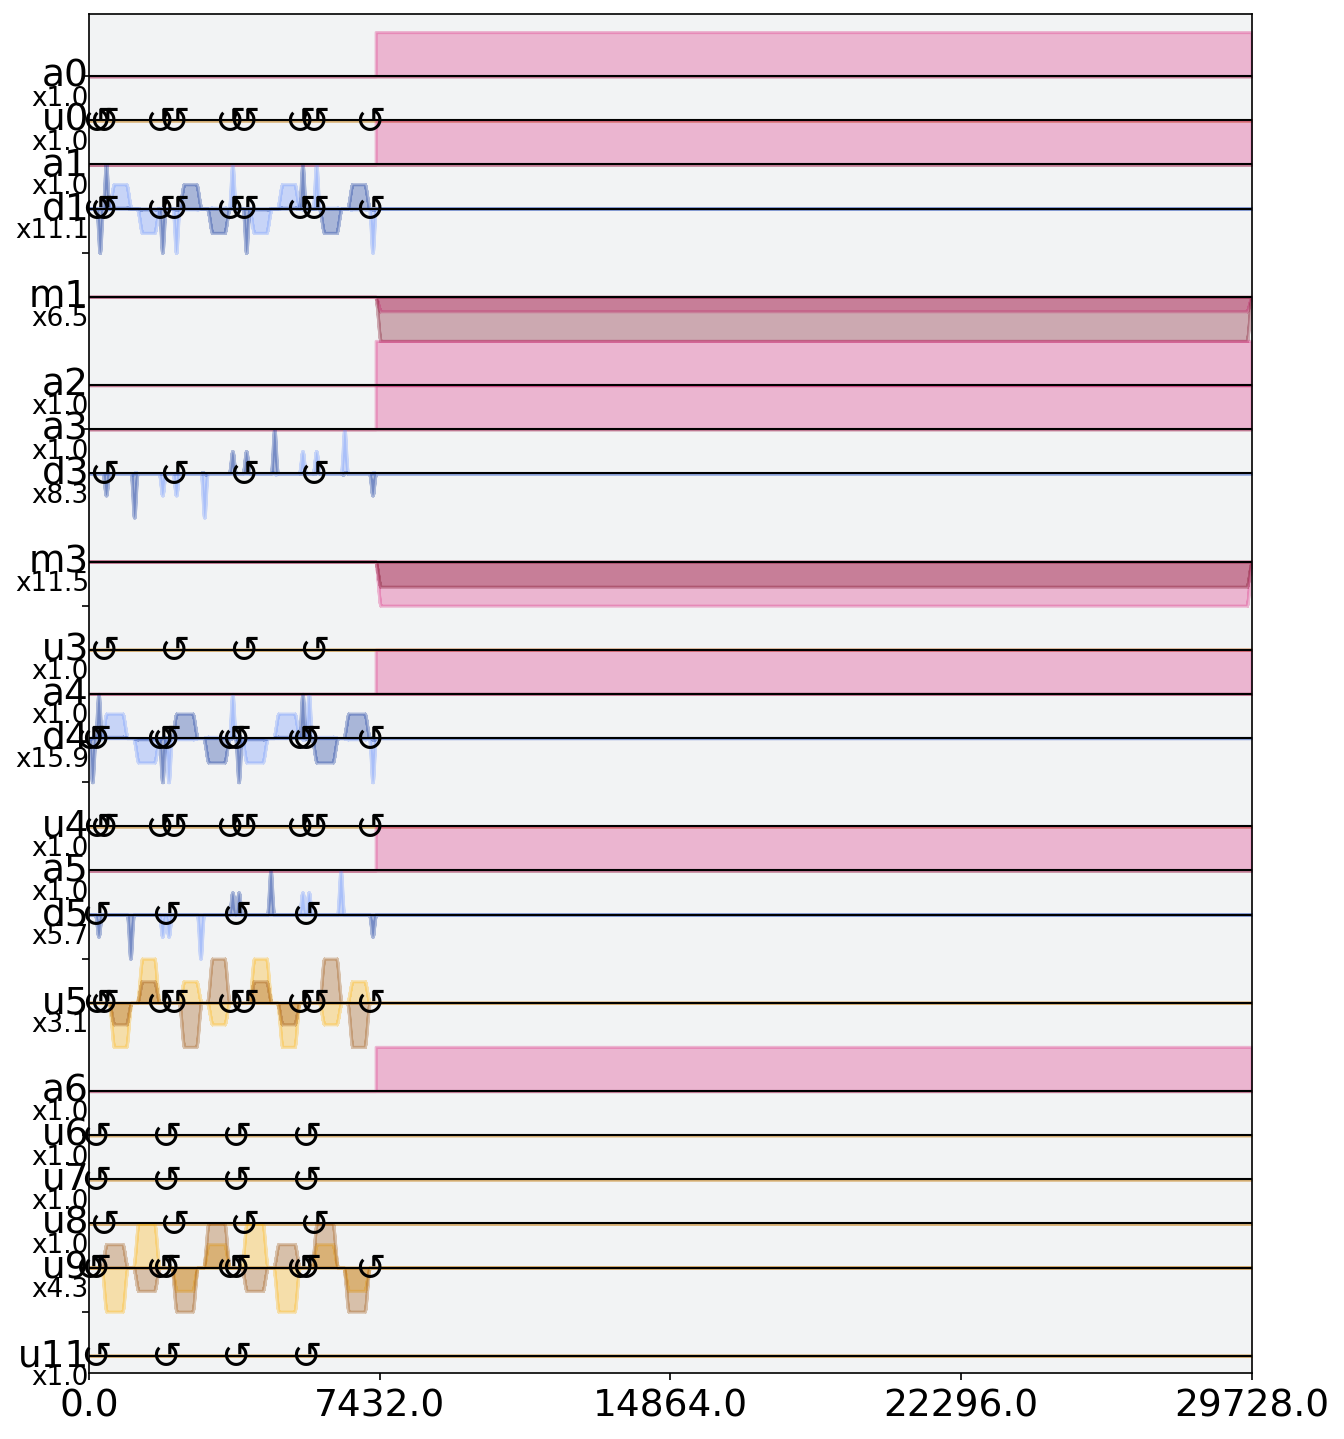

In [12]:
schd = schedule(compiled_circuit, backend)
pulse_drawer(schd)

In [4]:
job = execute(qc,backend=Aer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'00': 517, '01': 507}


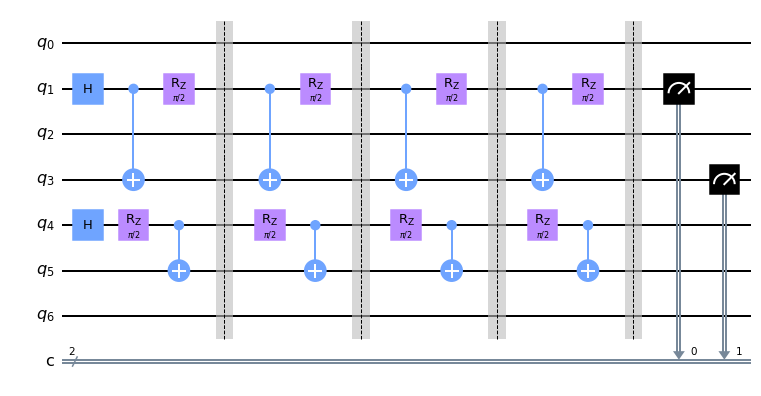

In [5]:
qc2 = QuantumCircuit(7,2)
qc2.h(1)
qc2.h(4)
qc2.cx(1,3)
qc2.cx(4,5)
qc2.barrier()

qc2.cx(1,3)
qc2.cx(4,5)
qc2.barrier()

qc2.cx(1,3)
qc2.cx(4,5)
qc2.barrier()

qc2.cx(1,3)
qc2.cx(4,5)
qc2.barrier()
qc2.measure([1,3],list(range(2)))
qc2.draw(output='mpl')

In [6]:
job1 = execute(qc, backend=backend, optimization_level=0, shots=8192)
print(job.job_id())

aa0d2bcb-5549-4cd6-b6d0-b31540b9a63c


In [7]:
job2 = execute(qc2, backend=backend, optimization_level=0, shots=8192)
print(job2.job_id())

602fd7a8e50d187840a88591


In [8]:
count1 = job1.result().get_counts()
count2 = job2.result().get_counts()

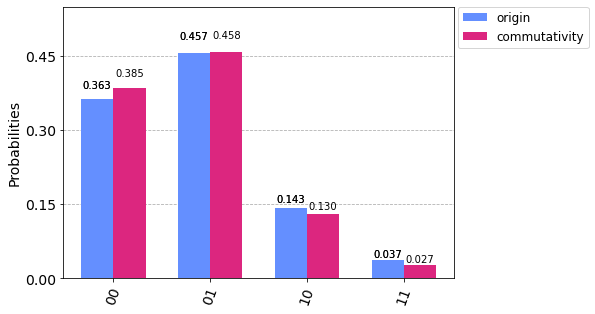

In [9]:
from qiskit.visualization import plot_histogram 
plot_histogram([count1, count2], legend=['origin', 'commutativity'])


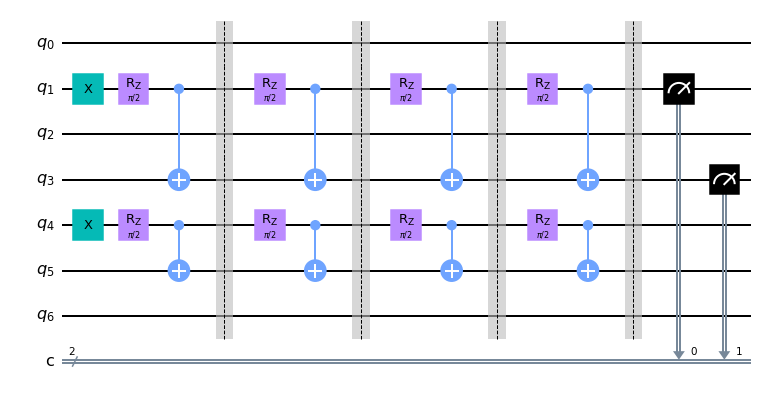

In [4]:
qc = QuantumCircuit(7,2)
qc.x(1)
qc.x(4)
qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()

qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()

qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()

qc.rz(pi/2,1)
qc.cx(1,3)
qc.rz(pi/2,4)
qc.cx(4,5)
qc.barrier()
qc.measure([1,3],list(range(2)))
qc.draw(output='mpl')

In [5]:
job = execute(qc,backend=Aer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'01': 1024}


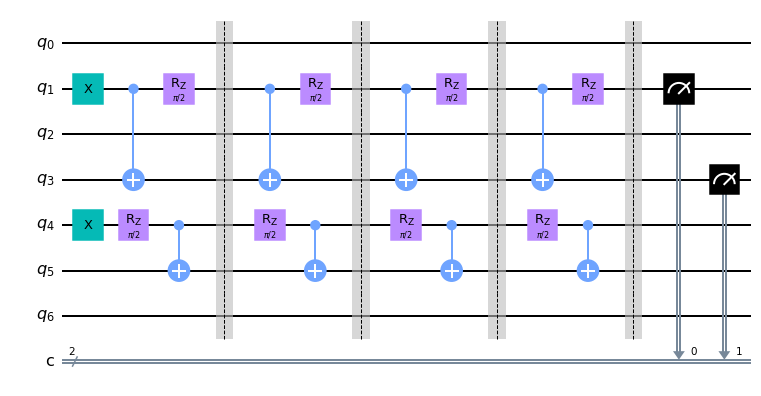

In [6]:
qc2 = QuantumCircuit(7,2)
qc2.x(1)
qc2.x(4)
qc2.cx(1,3)
qc2.rz(pi/2,1)
qc2.rz(pi/2,4)
qc2.cx(4,5)
qc2.barrier()

qc2.cx(1,3)
qc2.rz(pi/2,1)
qc2.rz(pi/2,4)
qc2.cx(4,5)
qc2.barrier()

qc2.cx(1,3)
qc2.rz(pi/2,1)
qc2.rz(pi/2,4)
qc2.cx(4,5)
qc2.barrier()

qc2.cx(1,3)
qc2.rz(pi/2,1)
qc2.rz(pi/2,4)
qc2.cx(4,5)
qc2.barrier()
qc2.measure([1,3],list(range(2)))
qc2.draw(output='mpl')

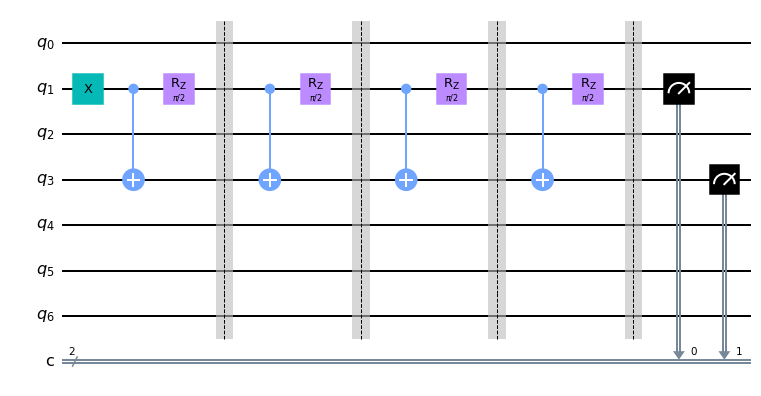

In [7]:
qc3 = QuantumCircuit(7,2)
qc3.x(1)
qc3.cx(1,3)
qc3.rz(pi/2,1)
qc3.barrier()

qc3.cx(1,3)
qc3.rz(pi/2,1)
qc3.barrier()

qc3.cx(1,3)
qc3.rz(pi/2,1)
qc3.barrier()

qc3.cx(1,3)
qc3.rz(pi/2,1)
qc3.barrier()
qc3.measure([1,3],list(range(2)))
qc3.draw(output='mpl')

In [ ]:
# qc4 = QuantumCircuit(7,2)
# qc4.x(1)
# qc4.x(4)
# qc4.cx(1,3)
# qc4.rz(pi/2,1)
# qc4.rz(pi/2,4)
# qc4.cx(4,5)
# qc4.barrier()

# qc4.cx(1,3)
# qc4.rz(pi/2,1)
# qc4.rz(pi/2,4)
# qc4.cx(4,5)
# qc4.barrier()

# qc4.cx(1,3)
# qc4.rz(pi/2,1)
# qc4.rz(pi/2,4)
# qc4.cx(4,5)
# qc4.barrier()

# qc4.cx(1,3)
# qc4.rz(pi/2,1)
# qc4.rz(pi/2,4)
# qc4.cx(4,5)
# qc4.barrier()
# qc4.measure([1,3],list(range(2)))
# qc4.draw(output='mpl')

In [11]:
job1 = execute(qc, backend=backend, optimization_level=0, shots=8192)
print(job.job_id())

102527ff-5725-46e4-b6b8-06a0bb71c4e2


In [12]:
job2 = execute(qc2, backend=backend, optimization_level=0, shots=8192)
print(job.job_id())

102527ff-5725-46e4-b6b8-06a0bb71c4e2


In [13]:
job3 = execute(qc3, backend=backend, optimization_level=0, shots=8192)
print(job.job_id())

102527ff-5725-46e4-b6b8-06a0bb71c4e2


In [6]:
job_ids = ['603013004b582754200d8b4e',
          '603013028df27eeafbb9211a',
          '6030130be50d189782a88913']

In [7]:
count1 = backend.retrieve_job(job_ids[0]).result().get_counts()
count2 = backend.retrieve_job(job_ids[1]).result().get_counts()
count3 = backend.retrieve_job(job_ids[2]).result().get_counts()

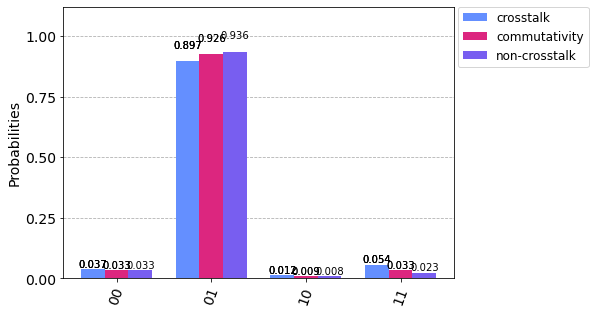

In [8]:
from qiskit.visualization import plot_histogram 
plot_histogram([count1, count2, count3], legend=['crosstalk', 'commutativity', 'non-crosstalk'])


In [9]:
from math import sqrt
z90 = 1.645 # 90%
z95 = 1.96  # 95%
z99 = 2.576 # 99%
def wilson_interval(counts, target: str, z: float):
    n = sum(counts.values())
    ns = counts.get(target, 0)
    nf = n - ns
    interval_wideness = z / (n + z**2) * sqrt(ns * nf / n + z**2 / 4)
    center = (ns + z**2 / 2) / (n + z**2)
    return center, center - interval_wideness, center + interval_wideness

In [11]:
c, cm, cp = wilson_interval(count1, "01", z90)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")
c, cm, cp = wilson_interval(count2, "01", z90)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")
c, cm, cp = wilson_interval(count3, "01", z90)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")

Mean value of 0.8968 comprised in [0.8913 , 0.9024]
Mean value of 0.9255 comprised in [0.9207 , 0.9303]
Mean value of 0.9354 comprised in [0.9309 , 0.9399]


In [12]:
c, cm, cp = wilson_interval(count1, "01", z95)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")
c, cm, cp = wilson_interval(count2, "01", z95)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")
c, cm, cp = wilson_interval(count3, "01", z95)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")

Mean value of 0.8968 comprised in [0.8902 , 0.9034]
Mean value of 0.9255 comprised in [0.9198 , 0.9311]
Mean value of 0.9353 comprised in [0.9300 , 0.9407]


In [13]:
c, cm, cp = wilson_interval(count1, "01", z99)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")
c, cm, cp = wilson_interval(count2, "01", z99)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")
c, cm, cp = wilson_interval(count3, "01", z99)
print(f"Mean value of {c:.4f} comprised in [{cm:.4f} , {cp:.4f}]")

Mean value of 0.8967 comprised in [0.8880 , 0.9053]
Mean value of 0.9253 comprised in [0.9178 , 0.9328]
Mean value of 0.9352 comprised in [0.9282 , 0.9422]
